In [1]:
import json
import pandas as pd
import numpy as np
import sys
import csv
import plotly.express as px
import matplotlib.pyplot as plt


csv.field_size_limit(sys.maxsize)


131072

In [ ]:
#from google.colab import files
#uploaded = files.upload()


Saving yelp_business_attributes.csv to yelp_business_attributes (1).csv


In [ ]:
#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['yelp_business_attributes.csv']))
# Dataset is now stored in a Pandas Dataframe

In [2]:
#File #1
biz_attr_df = pd.read_csv("/content/drive/MyDrive/yelp_business_attributes.csv", sep=',', engine='python')

pd.set_option('display.max_columns', None)
biz_attr_df.head()
#reviews_df = pd.read_csv("archive/yelp_review.csv", sep=',', engine='python')

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [ ]:
biz_attr_df.shape

(152041, 82)

In [3]:
#Splitting up the 5261668 rows in yelp_review.csv into three chunks for easier processing

reviews_df1 = pd.read_csv("/content/drive/MyDrive/yelp_review.csv", sep=',', engine='python', nrows = 2000000)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
reviews_df1.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
reviews_df1.shape

(2000000, 9)

In [4]:
rows_to_skip1 = range(1,2000001)

reviews_df2 = pd.read_csv("/content/drive/MyDrive/yelp_review.csv", sep=',', engine='python', header = 0, skiprows = rows_to_skip1, nrows = 2000000)

In [ ]:
reviews_df2.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,8t6KvX9bz3bhyGefiLgZqA,iBcjHYLO92izpT_1iOFXFA,BnMDLIYT17-fl6_pFpFlrA,5,2016-11-07,Very fast response time. Locked myself out of ...,1,1,0
1,xFTEkSEqiZjtDPrrSpb45g,H5U7NJWU7pA3-xLQg70OFw,K3lYaKPdaBim-LCOcmi6Jg,4,2017-06-12,You can't really have enough burger joints. Th...,3,0,1
2,Gzy30LHrzeO5BHkE66qrTQ,H5U7NJWU7pA3-xLQg70OFw,D9xr-6Io3hPOh5ZHFRVPTA,4,2016-10-11,"Small, clean, little, family owned and operate...",0,0,0
3,DXDCO1VDQm1WmVTgXlNDKA,H5U7NJWU7pA3-xLQg70OFw,4iSVxQKK1G3V-LBffQxaKg,5,2016-02-11,I stumbled upon Klavon's biking through the St...,0,0,0
4,D3zKtStdahALf7yjEOhXyw,H5U7NJWU7pA3-xLQg70OFw,rqcknDxg8lZAFN76YU7-BQ,5,2016-09-26,I really wish the bar space was bigger and ope...,1,1,2


In [ ]:
reviews_df2.shape

(2000000, 9)

In [5]:
rows_to_skip2 = range(1,4000001)

reviews_df3 = pd.read_csv("/content/drive/MyDrive/yelp_review.csv", sep=',', engine='python', skiprows = rows_to_skip2, nrows = 2000001)

In [ ]:
reviews_df3.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,CPtp3M97u3HFYzQ23ByYuw,eU6_LQNUfkfqvYXDr6TNCA,ujHiaprwCQ5ewziu0Vi9rw,1,2015-11-03,not close to what you expected. Food are badly...,0,0,0
1,buw21N9tg4EY5YO-2H-7dQ,sRqBJoQy4OxqiUe25eDSkw,mJXajC0a11guJHxJDs8ZTQ,1,2015-10-16,I was referred to Dr. Samantha Schoenhaus and ...,0,0,0
2,p7qXPFFa2R8Nb-enUSKzog,4qqat94SIpYJld3QUgd6BA,h39kjkUXJ33OPhFP7i9DMg,5,2017-09-11,Sumits Yoga is great! All the instructors do a...,0,0,0
3,huUvT-L5q9VAlAir4ZgJ3A,mOi3q_T3ZxTa7xv3vVnamQ,Zvnm7o2eMaYAEHS8YRn_EQ,3,2011-06-21,I'm giving it a three because of the fantastic...,0,0,0
4,d06LBKZ9Wy7Eo40ITz6ENQ,oNbkFvGTErw_ue_3_Mwcng,e5Qw3r7mkwPLcdDzZzTeew,2,2011-12-07,"I really wanted to like this place, I did. I l...",7,1,3


In [ ]:
reviews_df3.shape

(1261668, 9)

In [ ]:
#Filter out any business that doesn't have either true or false for RestaurantsDelivery
#152041 businesses total
biz_attr_df['RestaurantsDelivery'].value_counts()
#!!! Concerning that most of the business aren't restaurants despite that being the main use for Yelp

Na       151293
False       482
True        266
Name: RestaurantsDelivery, dtype: int64

In [ ]:
#Trying other proxies for restaurant y/n status
biz_attr_df['DriveThru'].value_counts()

Na         151127
no            445
outdoor       362
yes           107
Name: DriveThru, dtype: int64

In [ ]:
vegan_count = biz_attr_df['DietaryRestrictions_vegan'].value_counts()
vegan_count

Na       151931
False        91
True         19
Name: DietaryRestrictions_vegan, dtype: int64

In [ ]:
veget_count = biz_attr_df['DietaryRestrictions_vegetarian'].value_counts()
veget_count

Na       151931
False       105
True          5
Name: DietaryRestrictions_vegetarian, dtype: int64

In [ ]:
#No missing data in reviews
np.sum(reviews_df1.isnull())

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

1025908

263088

In [6]:
#Merging all three review dataframes
merged_reviews_123 = pd.concat([reviews_df1, reviews_df2, reviews_df3])
merged_reviews_123.shape

(5261668, 9)

In [ ]:
#Try to delete reviews_df1, reviews_df2, and reviews_df3 to free up memory
del reviews_df1
del reviews_df2
del reviews_df3

In [ ]:
reviews_df1.head()

NameError: ignored

In [ ]:
#searching through reviews for "food" as proxy for restaurants - total = 1809321 instances of 'food'
np.sum(merged_reviews_123['text'].str.contains("food", case=False, flags=0, na=None, regex = False))

1809321

In [ ]:
#searching through reviews for "eat" as proxy for restaurants - total = 2701561 instances of 'eat'
#note that this will include words like "feat" and "meat" have that the string "eat" inside
np.sum(merged_reviews_123['text'].str.contains("eat", case=False, flags=0, na=None, regex = False))

2701561

In [ ]:
#searching through reviews for "restaurant" as proxy for restaurants - total = 695568 instances of 'restaurant'
np.sum(merged_reviews_123['text'].str.contains("restaurant", case=False, flags=0, na=None, regex = False))

695568

In [ ]:
#searching through reviews for "vegan" as proxy for vegan restaurants - total = 41819 instances of 'vegan'
np.sum(merged_reviews_123['text'].str.contains("vegan", case=False, flags=0, na=None, regex = False))

41819

In [ ]:
#searching through reviews for "vegetarian" as proxy for vegetarian restaurants - total = 57976 instances of 'vegetarian'
np.sum(merged_reviews_123['text'].str.contains("vegetarian", case=False, flags=0, na=None, regex = False))

57976

In [9]:
biz_reviews_attrs = pd.merge(merged_reviews_123, biz_attr_df, how = 'left', on = 'business_id' )
biz_reviews_attrs.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,Ambience_hipster,Ambience_divey,Ambience_touristy,Ambience_trendy,Ambience_upscale,Ambience_casual,RestaurantsGoodForGroups,Caters,WiFi,RestaurantsReservations,RestaurantsTakeOut,HappyHour,GoodForDancing,RestaurantsTableService,OutdoorSeating,RestaurantsDelivery,BestNights_monday,BestNights_tuesday,BestNights_friday,BestNights_wednesday,BestNights_thursday,BestNights_sunday,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0,Na,Na,Na,Na,False,True,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0,Na,Na,Na,Na,False,True,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0,Na,Na,Na,Na,False,True,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,Na,Na,Na,Na,False,False,False,True,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0,Na,Na,Na,Na,False,True,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [ ]:
biz_reviews_attrs.shape

(5261668, 90)

In [7]:
#from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [ ]:
#Date entries are in str format
biz_reviews_attrs['date'][1]

'2016-05-28'

In [ ]:
#Transforming the date column to datetime, not adding:

biz_reviews_attrs['date'] = pd.to_datetime(biz_reviews_attrs['date'])

In [ ]:
biz_reviews_attrs.shape

(5261668, 90)

In [ ]:
type(biz_reviews_attrs['date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
biz_reviews_attrs['review_year'] = biz_reviews_attrs['date'].dt.year
biz_reviews_attrs['review_month'] = biz_reviews_attrs['date'].dt.month
biz_reviews_attrs['review_date'] = biz_reviews_attrs['date'].dt.day

In [ ]:
#Datetimes are all ints now in their new columns
type(biz_reviews_attrs['review_date'][1])

In [ ]:
#Three new columns added
biz_reviews_attrs.shape

(5261668, 93)

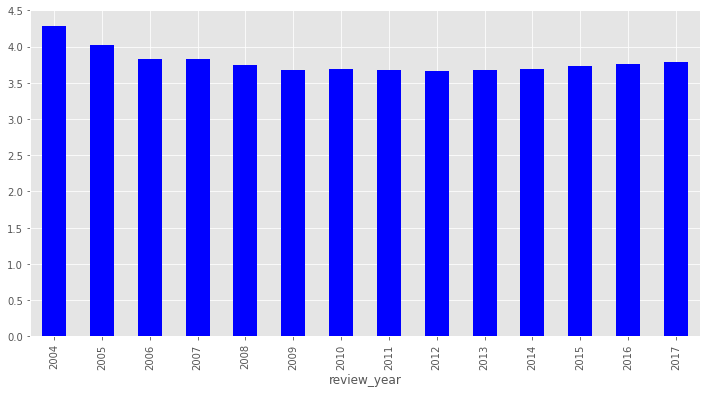

In [ ]:
#Plot star ratings by date to see how they changed over time ()
#merged_reviews_123['text'].str.contains("food", case=False, flags=0, na=None, regex = False)
#need to create separate graphs for omni restaurants, vegetarian, and vegan ones.

plt.figure(figsize = (12,6))
biz_reviews_attrs.groupby(['review_year'])['stars'].mean().plot.bar(color = 'b')

In [8]:
restaurants = merged_reviews_123.loc[merged_reviews_123['text'].str.contains("food", case=False, flags=0, na=None, regex = False)]

In [ ]:
#Full text entries are only viewable one at a time
restaurants['text'][3]

"Love coming here. Yes the place always needs the floor swept but when you give out  peanuts in the shell how won't it always be a bit dirty. \n\nThe food speaks for itself, so good. Burgers are made to order and the meat is put on the grill when you order your sandwich. Getting the small burger just means 1 patty, the regular is a 2 patty burger which is twice the deliciousness. \n\nGetting the Cajun fries adds a bit of spice to them and whatever size you order they always throw more fries (a lot more fries) into the bag."

In [ ]:
restaurants.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
10,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,This is currently my parents new favourite res...,1,0,0
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1
17,xdu8nXrbNKeaywCX79KZSw,u0LXt3Uea_GidxRW1xcsfg,PFPUMF38-lraKzLcTiz5gQ,3,2010-09-15,Came here with my girlfriends one Sunday after...,2,0,0
20,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0


In [9]:
restaurants['date'] = pd.to_datetime(restaurants['date'])

restaurants['review_year'] = restaurants['date'].dt.year
restaurants['review_month'] = restaurants['date'].dt.month
restaurants['review_day'] = restaurants['date'].dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
restaurants.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,review_year,review_month,review_day
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,2016,5,28
10,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,This is currently my parents new favourite res...,1,0,0,2013,5,1
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,2012,12,3
17,xdu8nXrbNKeaywCX79KZSw,u0LXt3Uea_GidxRW1xcsfg,PFPUMF38-lraKzLcTiz5gQ,3,2010-09-15,Came here with my girlfriends one Sunday after...,2,0,0,2010,9,15
20,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0,2012,10,19


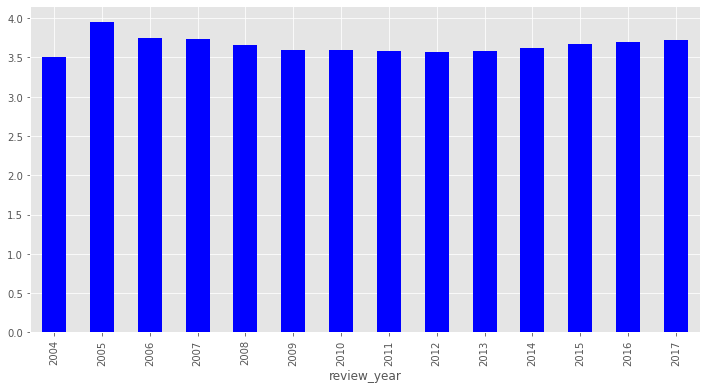

In [ ]:
plt.figure(figsize = (12,6))
restaurants.groupby(['review_year'])['stars'].mean().plot.bar(color = 'b')

In [10]:
#merged_reviews_123.loc[merged_reviews_123['text'].str.contains("food", case=False, flags=0, na=None, regex = False)]
restaurants['vegetarian_review'] = restaurants['text'].str.contains("vegetarian", case=False, flags=0, na=None, regex = False)
restaurants['vegan_review'] = restaurants['text'].str.contains("vegan", case=False, flags=0, na=None, regex = False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
restaurants.head(30)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,review_year,review_month,review_day,vegetarian,vegan,vegetarian_review,vegan_review,omnivore_review,review_veg_code
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,2016,5,28,False,False,False,False,True,Omnivore
10,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,This is currently my parents new favourite res...,1,0,0,2013,5,1,False,False,False,False,True,Omnivore
13,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,2012,12,3,False,True,False,True,False,Vegan
17,xdu8nXrbNKeaywCX79KZSw,u0LXt3Uea_GidxRW1xcsfg,PFPUMF38-lraKzLcTiz5gQ,3,2010-09-15,Came here with my girlfriends one Sunday after...,2,0,0,2010,9,15,False,False,False,False,True,Omnivore
20,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0,2012,10,19,False,False,False,False,True,Omnivore
21,Kki2nwtP8U2qmWwRvPwLRA,u0LXt3Uea_GidxRW1xcsfg,RWGI8u00x5GghYCEzpYrIg,4,2011-10-14,This place reminds of St Lawrence Market in To...,0,0,1,2011,10,14,False,False,False,False,True,Omnivore
23,ypjtMQLKdAwKGRS-KU7oxA,u0LXt3Uea_GidxRW1xcsfg,hjk3ox7w1akbEuOgTJ03Bw,1,2012-05-10,Food is very bland - not authentic at all.\n\n...,4,2,0,2012,5,10,False,False,False,False,True,Omnivore
25,Ia-w-nR1FrlzsiuEiqqlbg,u0LXt3Uea_GidxRW1xcsfg,Eox_Qq74oaFZ-YjthpHhBw,3,2011-07-18,Service is really slow here. I waited for over...,1,1,1,2011,7,18,False,False,False,False,True,Omnivore
26,y21Fom8a_SdAyC6I0v554w,u0LXt3Uea_GidxRW1xcsfg,zxJlg4XCHNoFy78WZPv89w,2,2011-09-28,"a few years ago, this used to be the place to ...",0,0,0,2011,9,28,False,False,False,False,True,Omnivore
29,iYlepMJ6j4whB8gxiZm6mw,u0LXt3Uea_GidxRW1xcsfg,AIUFSIIdCEi3XoRJaxtDLQ,4,2016-04-12,Love the selection of winter gear here for my ...,0,0,0,2016,4,12,False,False,False,False,True,Omnivore


In [11]:
def is_omnivore(is_vegetarian,is_vegan):
  if is_vegetarian or is_vegan:
    return False
  return True

In [13]:
restaurants['omnivore_review'] = restaurants.apply(lambda x: is_omnivore(x['vegetarian_review'],x['vegan_review']), axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
def veg_code(is_vegetarian,is_vegan):
  if is_vegetarian:
    return 'Vegetarian'
  if is_vegan:
    return 'Vegan'
  return 'Omnivore'

In [16]:
restaurants['review_veg_code'] = restaurants.apply(lambda x: veg_code(x['vegetarian_review'],x['vegan_review']), axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
import plotly.express as px

#This didn't work
#restaurants.groupby('veg_code')['stars'].mean().plot(legend=True)
#plt.figure(figsize = (12,6))
#fig1 = restaurants.groupby(['veg_code'],'year'])['stars'].mean().plot.bar(color = 'b')
#fig1.show()


grouped_df = restaurants.groupby(by=["review_year","review_veg_code"], as_index=False).agg(
    {"stars": "mean"}
)
fig1 = px.bar(
    data_frame=grouped_df,
    x="review_year",
    y="stars",
    color="review_veg_code",
    barmode ="group",
    title = 'Average Star Rating of Restaurants by Year and Food Type'
)

fig1.show()

In [45]:
#Try making a line graph
fig2 = px.line(data_frame = grouped_df, x='review_year', y='stars', line_group = 'review_veg_code', color = 'review_veg_code', color_discrete_sequence=['red','green','blue'])

fig2.update_xaxes(dtick = 1)

#This is effectively graphing the reviews by year, not restaurants

In [23]:
#Make a graph of how ratings of vegetarian/vegan restaurants differ if reviewer is veg versus omni (imagine 3 separate panels )
#What is a proxy for user diet status?  Would assuming that if >50% of their comments have the word vegan or vegetarian work?  
#How do I get all the reviews within/by a given user?

#user_id is the reviewer column
#Text is the review content column

#Need to do the same for restaurants

#proportion of reviews by veg_code
user_veg_code = restaurants.groupby(['user_id'])[['vegan_review', 'vegetarian_review','omnivore_review']].mean()


biz_veg_code = restaurants.groupby(['business_id'])[['vegan_review', 'vegetarian_review','omnivore_review']].mean()

user_veg_code.columns = ['user_vegan', 'user_vegetarian', 'user_omnivore']
biz_veg_code.columns = ['biz_vegan', 'biz_vegetarian', 'biz_omnivore']


restaurants = pd.merge(restaurants, user_veg_code, how = 'left', on = 'user_id')
restaurants = pd.merge(restaurants, biz_veg_code, how = 'left', on = 'business_id')

restaurants.head()








# def reviewer_code(user_id,text):
#   if ('vegetarian' in text & 'vegan' in text):
#     return 'vegan'

#   elif ('vegetarian' in text):
#     return 'vegetarian'

#   elif ('vegan' in text):
#     return 'vegan'

#   else: return 'omnivore'



,review_id,user_id,business_id,stars,date,text,useful,funny,cool,review_year,review_month,review_day,vegetarian,vegan,vegetarian_review,vegan_review,omnivore_review,review_veg_code,user_vegan,user_vegetarian,user_omnivore,biz_vegan,biz_vegetarian,biz_omnivore
0,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,2016,5,28,False,False,False,False,True,Omnivore,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
1,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,This is currently my parents new favourite res...,1,0,0,2013,5,1,False,False,False,False,True,Omnivore,0.111111,0.074074,0.814815,0.000000,0.000000,1.000000
2,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,2012,12,3,False,True,False,True,False,Vegan,0.111111,0.074074,0.814815,0.001136,0.009091,0.989773
3,xdu8nXrbNKeaywCX79KZSw,u0LXt3Uea_GidxRW1xcsfg,PFPUMF38-lraKzLcTiz5gQ,3,2010-09-15,Came here with my girlfriends one Sunday after...,2,0,0,2010,9,15,False,False,False,False,True,Omnivore,0.111111,0.074074,0.814815,0.142857,0.071429,0.857143
4,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0,2012,10,19,False,False,False,False,True,Omnivore,0.111111,0.074074,0.814815,0.006667,0.026667,0.973333


In [27]:
def veg_quant(x_vegetarian,x_vegan):
  if ((x_vegetarian >= 0.5) & (x_vegan >= 0.5)):
    return 'Vegan'
  elif ((x_vegetarian < 0.5) & (x_vegan >= 0.5)):
    return 'Vegan'
  elif ((x_vegetarian >= 0.5) & (x_vegan < 0.5)):
    return 'Vegetarian'
  else:
    return 'Omnivore'


#fig3 = px.line(data_frame = grouped_df, x='review_year', y='stars', line_group = ['user_vegan', 'user_vegetarian','user_omnivore'], color = 'user_veg_code')



In [28]:
restaurants['user_veg_code'] = restaurants.apply(lambda x: veg_quant(x['user_vegetarian'],x['user_vegan']), axis = 1)
restaurants['biz_veg_code'] = restaurants.apply(lambda x: veg_quant(x['biz_vegetarian'],x['biz_vegan']), axis = 1)


In [31]:
restaurants.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,review_year,review_month,review_day,vegetarian,vegan,vegetarian_review,vegan_review,omnivore_review,review_veg_code,user_vegan,user_vegetarian,user_omnivore,biz_vegan,biz_vegetarian,biz_omnivore,user_veg_code,biz_veg_code
0,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0,2016,5,28,False,False,False,False,True,Omnivore,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,Omnivore,Omnivore
1,PIsUSmvaUWB00qv5KTF1xA,u0LXt3Uea_GidxRW1xcsfg,z8oIoCT1cXz7gZP5GeU5OA,4,2013-05-01,This is currently my parents new favourite res...,1,0,0,2013,5,1,False,False,False,False,True,Omnivore,0.111111,0.074074,0.814815,0.000000,0.000000,1.000000,Omnivore,Omnivore
2,lsoSqIrrDbQvWpMvsSj2xw,u0LXt3Uea_GidxRW1xcsfg,RtUvSWO_UZ8V3Wpj0n077w,3,2012-12-03,Wanted to check out this place due to all the ...,2,1,1,2012,12,3,False,True,False,True,False,Vegan,0.111111,0.074074,0.814815,0.001136,0.009091,0.989773,Omnivore,Omnivore
3,xdu8nXrbNKeaywCX79KZSw,u0LXt3Uea_GidxRW1xcsfg,PFPUMF38-lraKzLcTiz5gQ,3,2010-09-15,Came here with my girlfriends one Sunday after...,2,0,0,2010,9,15,False,False,False,False,True,Omnivore,0.111111,0.074074,0.814815,0.142857,0.071429,0.857143,Omnivore,Omnivore
4,HSR2RLOifd0cvSNVqGXkMQ,u0LXt3Uea_GidxRW1xcsfg,28adZ4lsuUeVB2aWzohK9g,3,2012-10-19,was always intrigued of this place when I pass...,1,0,0,2012,10,19,False,False,False,False,True,Omnivore,0.111111,0.074074,0.814815,0.006667,0.026667,0.973333,Omnivore,Omnivore


In [34]:
count = restaurants[['user_veg_code','biz_veg_code']].value_counts()
print(count)

user_veg_code  biz_veg_code
Omnivore       Omnivore        1775071
Vegetarian     Omnivore          12836
Vegan          Omnivore           9654
Omnivore       Vegan              6310
Vegan          Vegan              3029
Omnivore       Vegetarian         1573
Vegetarian     Vegan               355
               Vegetarian          334
Vegan          Vegetarian          159
dtype: int64


In [43]:
#Graphing how each type of restaurant gets evaluated by people with different diets

grouped_df2 = restaurants.groupby(by=["review_year","user_veg_code", "biz_veg_code"], as_index=False).agg(
    {"stars": "mean"}
)
fig3 = px.line(data_frame = grouped_df2, x='review_year', y='stars', line_group = 'user_veg_code', color = 'user_veg_code', color_discrete_sequence=['red','blue','green'], facet_col = 'biz_veg_code', title = "Star Ratings by Business Type and User Type")
fig3.update_xaxes(dtick = 1)

fig3.show()

In [ ]:
#Average NLP sentiment score over time/by year


In [ ]:
#Wordcloud on positive and negative reviews

from wordcloud import WordCloud


In [ ]:
#Need help uploading to GitHub